## Getting Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Townsend/Data/V0.03 Townsend Data - Sheet1.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Previous Close,Change,Sentiment
0,########,3665.44,3707.71,3636.87,3674.84,3666.77,0.220085,-2.63
1,########,3728.18,3728.18,3639.77,3666.77,3789.99,-3.251196,-2.60
2,########,3764.05,3837.56,3722.30,3789.99,3735.48,1.459250,-2.58
3,########,3763.52,3778.18,3705.68,3735.48,3749.63,-0.377371,-2.60
4,########,3838.15,3838.15,3734.30,3749.63,3900.86,-3.876837,-2.61


In [ ]:
d_reversed = df['Date'].values
dates_same_names = np.array(d_reversed[::-1])

count = 0
days = []
for i in d_reversed:
  days.append(count)
  count += 1

c_reversed = df['Change'].values
changes = c_reversed[::-1]

s_reversed = df['Sentiment'].values
sentiments = s_reversed[::-1]

cl_reversed = df['Close'].values
closes = cl_reversed[::-1]

## Plotting Date vs Close

(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 9 Text major ticklabel objects>)

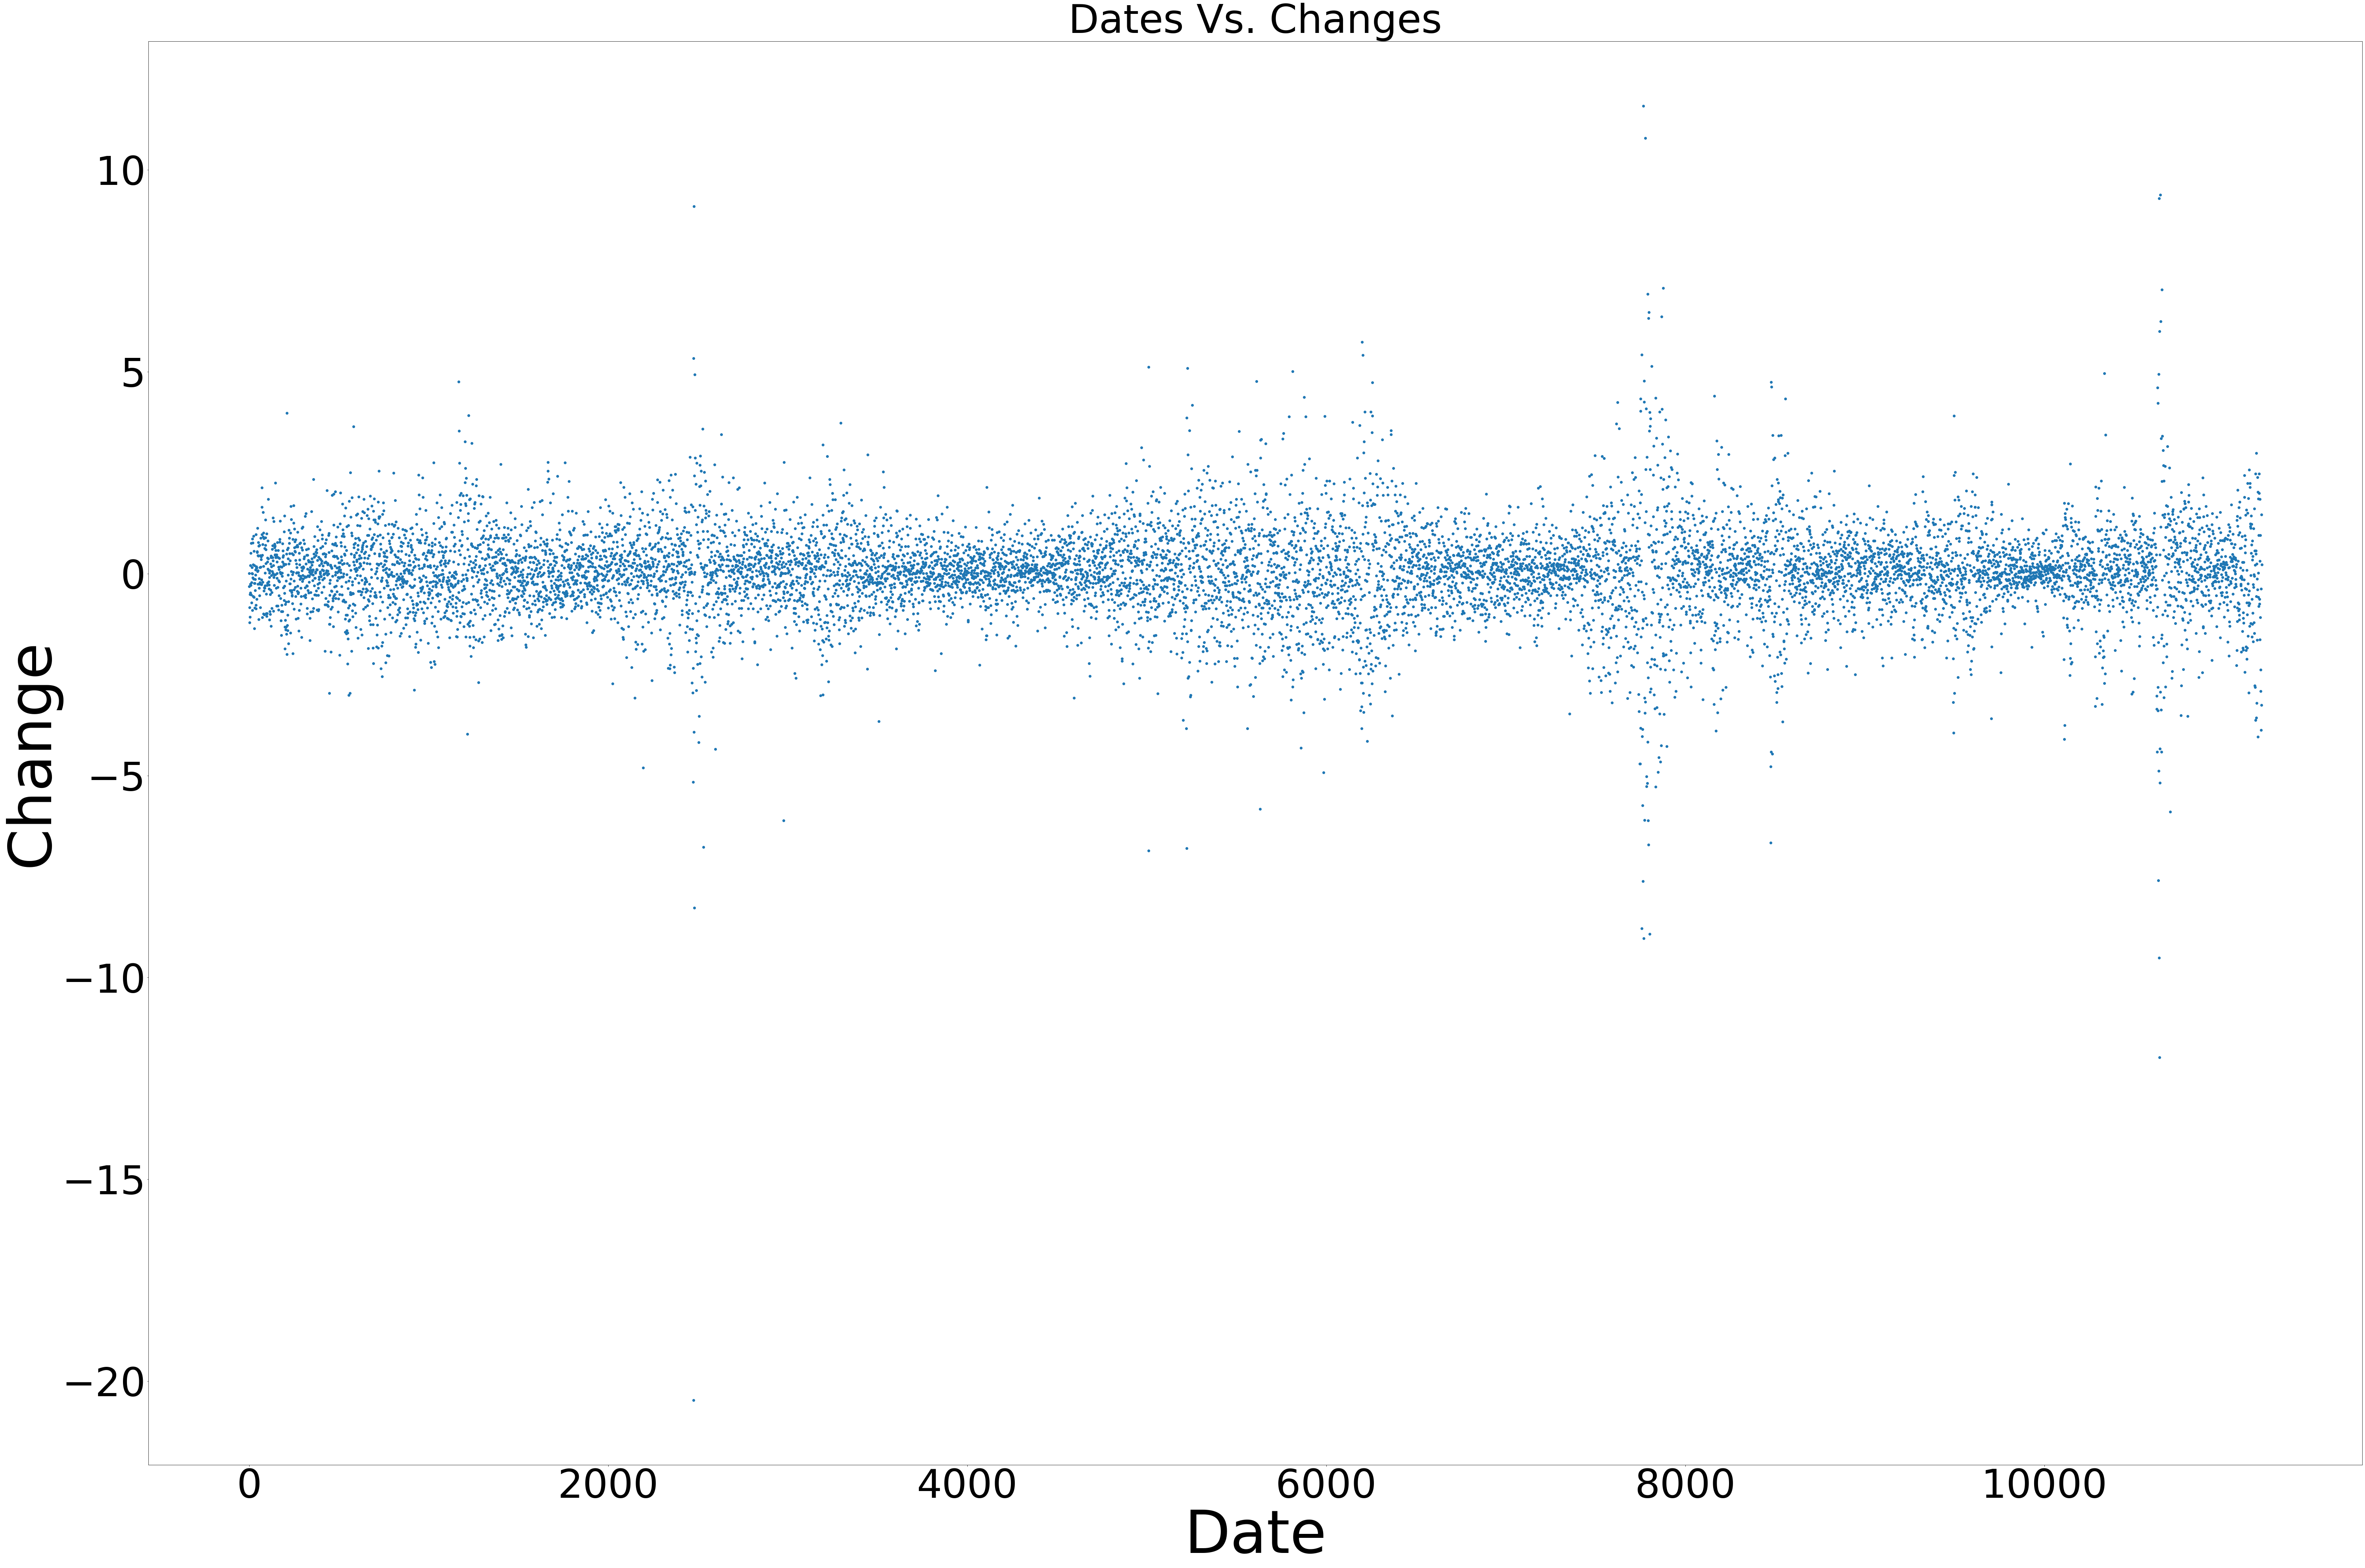

In [ ]:
plt.figure(figsize=(100,66))
plt.scatter(days, changes)
plt.xlabel('Date', fontsize=150)
plt.ylabel('Change', fontsize=150)
plt.title('Dates Vs. Changes', fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

## Plotting Histogram of Returns

Mean: 0.03899460234106732
Standard Deviation: 1.1165840643916747
Range: 32.0469621
Min: -20.46692607
Max: 11.58003603
Median: 0.056438528235
Covariance: 1.2468711814853874


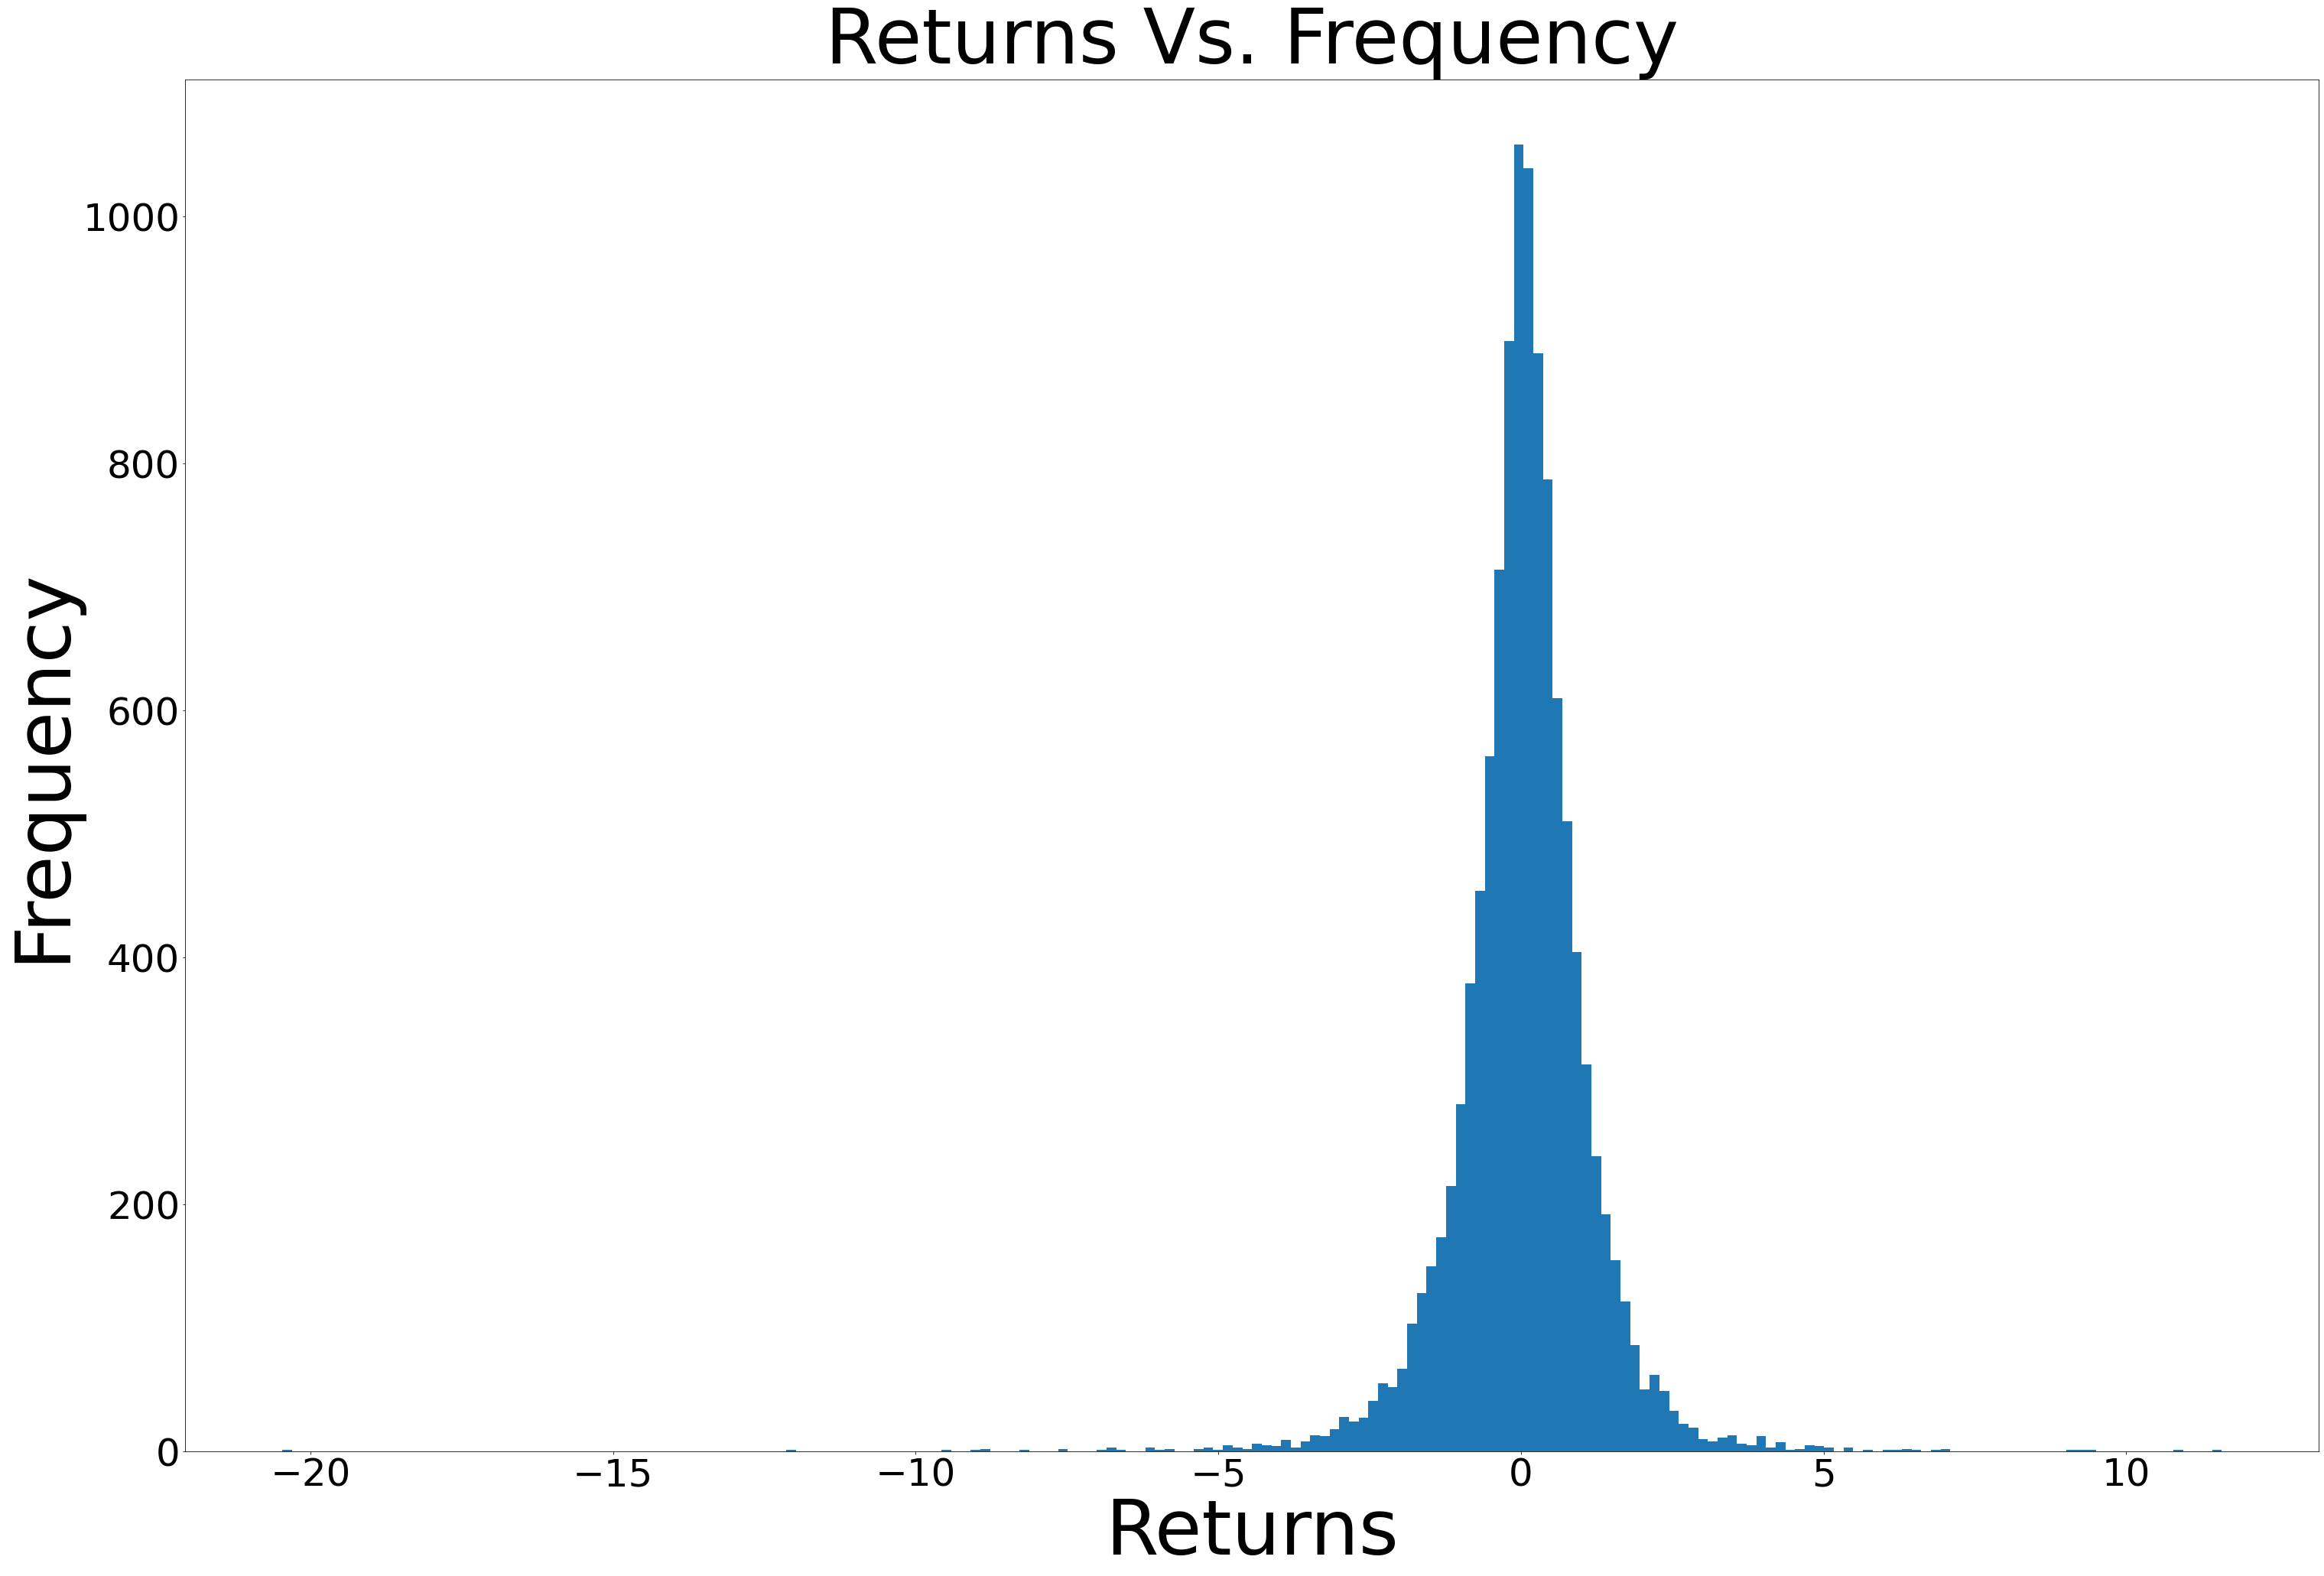

In [ ]:
plt.figure(figsize=(50,33))
plt.hist(changes, bins=200)
plt.xlabel('Returns', fontsize=100)
plt.ylabel('Frequency', fontsize=100)
plt.title('Returns Vs. Frequency', fontsize=100)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
mean = np.mean(changes)
stddev = np.std(changes)
range = np.ptp(changes)
min = np.min(changes)
max = np.max(changes)
median = np.median(changes)
covariance = np.cov(changes)
print('Mean: {}'.format(mean))
print('Standard Deviation: {}'.format(stddev))
print('Range: {}'.format(range))
print('Min: {}'.format(min))
print('Max: {}'.format(max))
print('Median: {}'.format(median))
print('Covariance: {}'.format(covariance))

## Plotting Histogram of Sentiments

Mean: 0.2889913104744011
Standard Deviation: 0.934425386346484
Range: 5.96
Min: -4.53
Max: 1.43
Median: 0.55
Covariance: 0.8732533453149709


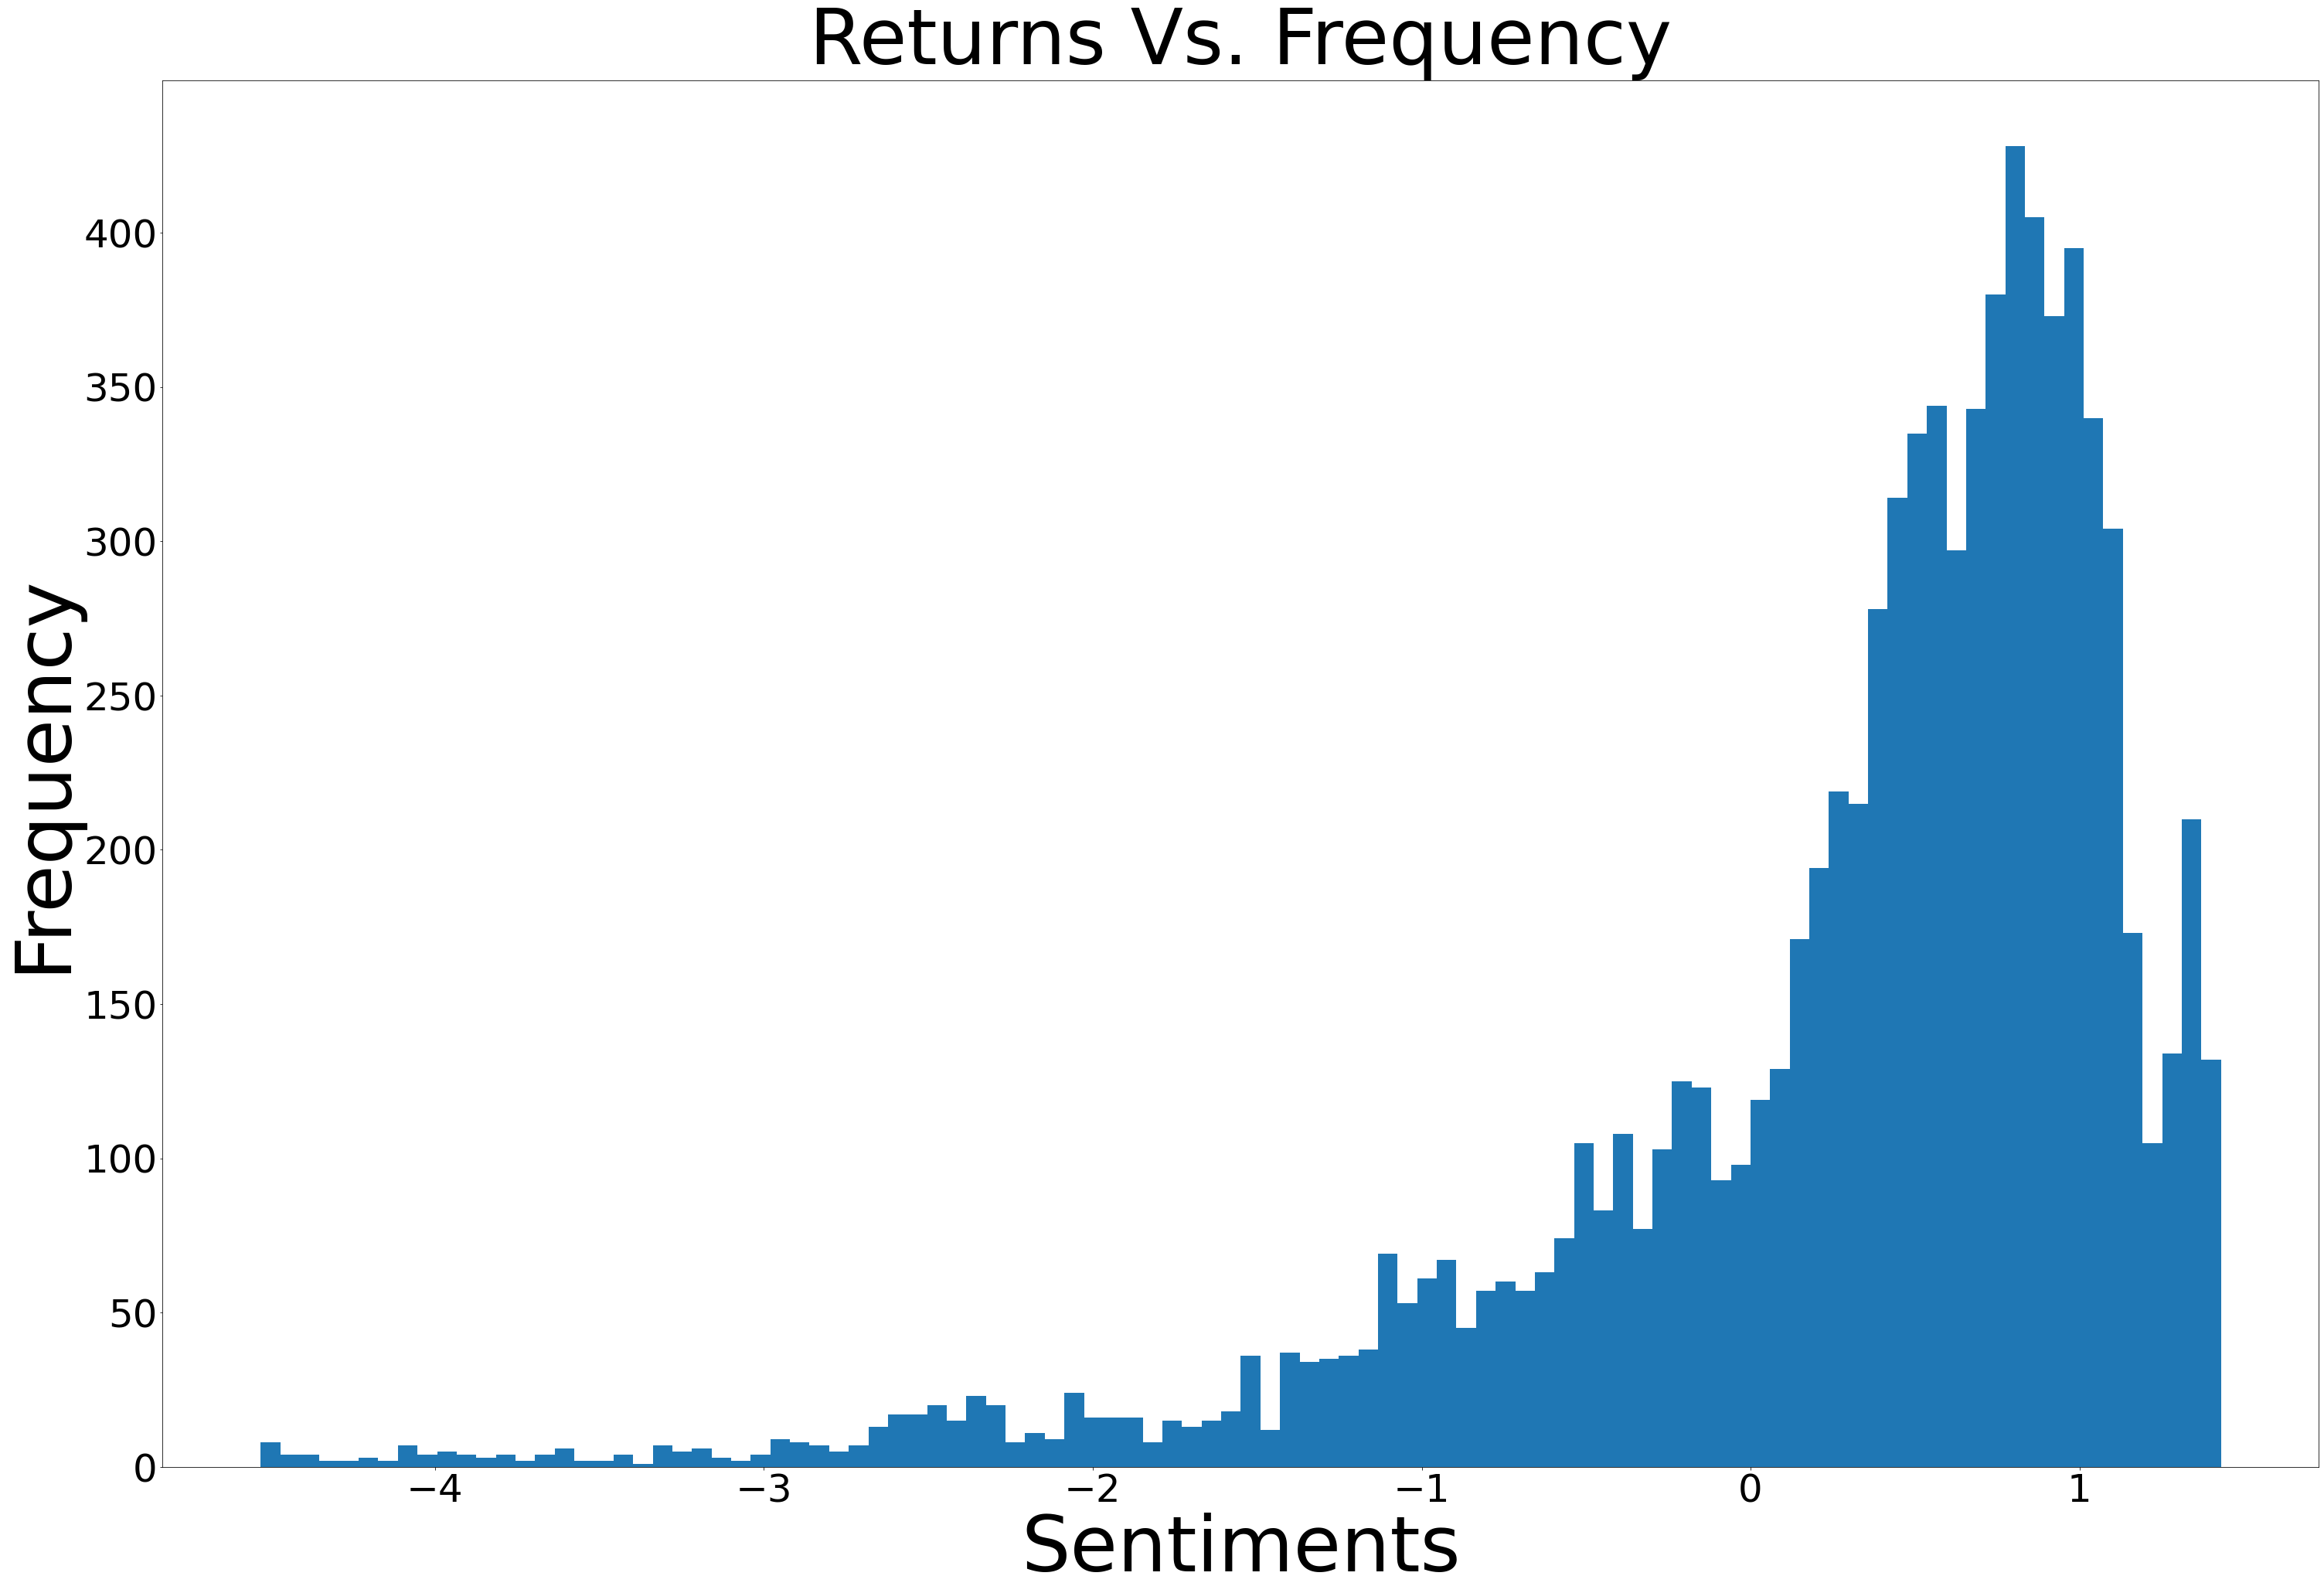

In [ ]:
sentiments_no_nan = sentiments[np.logical_not(np.isnan(sentiments))]
plt.figure(figsize=(50,33))
plt.hist(sentiments_no_nan, bins=100)
plt.xlabel('Sentiments', fontsize=100)
plt.ylabel('Frequency', fontsize=100)
plt.title('Returns Vs. Frequency', fontsize=100)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
mean = np.mean(sentiments_no_nan)
stddev = np.std(sentiments_no_nan)
range = np.ptp(sentiments_no_nan)
min = np.min(sentiments_no_nan)
max = np.max(sentiments_no_nan)
median = np.median(sentiments_no_nan)
covariance = np.cov(sentiments_no_nan)
print('Mean: {}'.format(mean))
print('Standard Deviation: {}'.format(stddev))
print('Range: {}'.format(range))
print('Min: {}'.format(min))
print('Max: {}'.format(max))
print('Median: {}'.format(median))
print('Covariance: {}'.format(covariance))

## Plotting Return vs Sentiment

In [ ]:
from numpy.ma.core import size
print(changes.size)
print(sentiments_no_nan.size)
print(closes.size)
print(changes[11211])
print(sentiments_no_nan[8515])

changes_len_of_sentimen = []
closes_len_of_sentimen = []

diff = changes.size - sentiments_no_nan.size
count = 0
for i in changes:
  if count >= diff:
    changes_len_of_sentimen.append(i)
  count += 1

count = 0
for j in closes:
  if count >= diff:
    closes_len_of_sentimen.append(j)
  count += 1

changes_len_of_sentiment = np.array(changes_len_of_sentimen)
closes_len_of_sentiment = np.array(closes_len_of_sentimen)

print(changes_len_of_sentiment.size)
print(changes_len_of_sentiment[8515])

print(closes_len_of_sentiment.size)
print(closes_len_of_sentiment[8515])

print(changes_len_of_sentiment[0])
print(closes_len_of_sentiment[0])
print(sentiments_no_nan[0])

11212
8516
11212
0.2200847067
-2.63
8516
0.2200847067
8516
3674.84
-1.212144387
258.35
0.0


(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.]),
 <a list of 8 Text major ticklabel objects>)

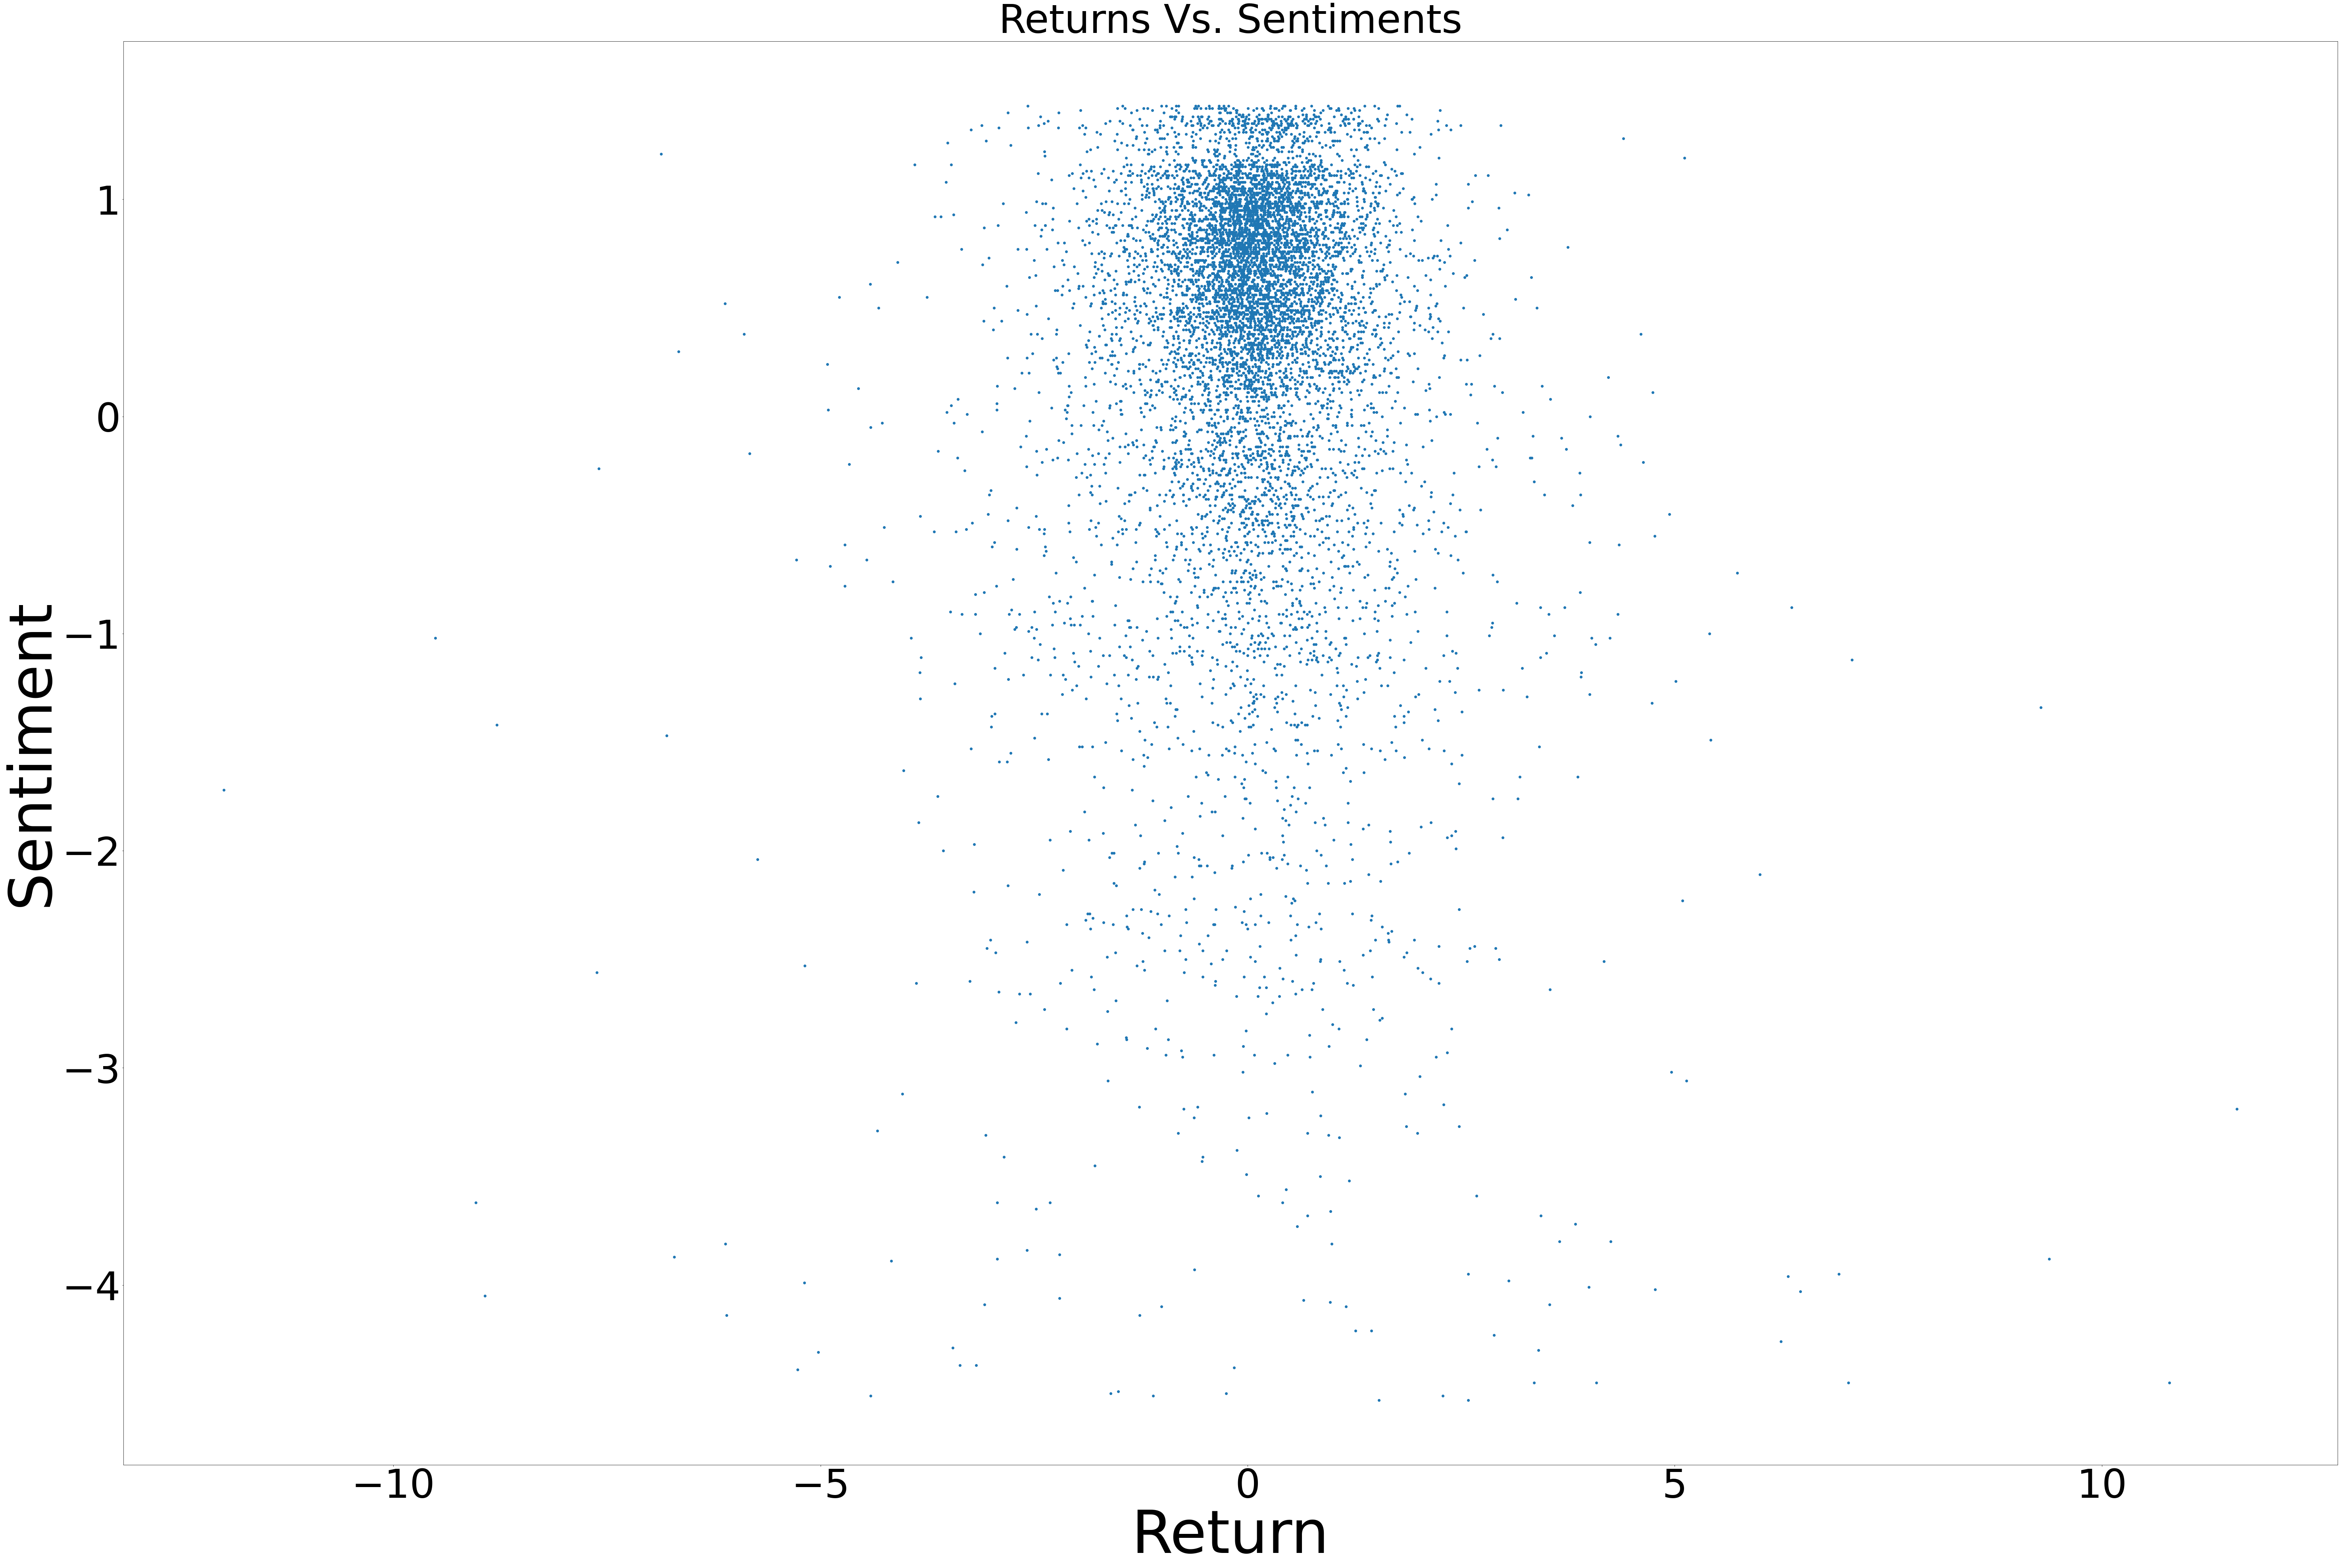

In [ ]:
plt.figure(figsize=(100,66))
plt.scatter(changes_len_of_sentiment, sentiments_no_nan)
plt.xlabel('Return', fontsize=150)
plt.ylabel('Sentiment', fontsize=150)
plt.title('Returns Vs. Sentiments', fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

## Plotting Date by Close(Blue and Red)

In [ ]:
# Cleaning up data

blue_closes = []
red_closes = []
blue_days = []
red_days = []
all_days = []
green_sentiments = []
red_sentiments = []
sentiments_no_nan = sentiments_no_nan.astype('float32') 
count = 0
for i in sentiments_no_nan:
  all_days.append(count)
  if i > 0:
    blue_closes.append(closes_len_of_sentiment[count])
    blue_days.append(count)
    green_sentiments.append(sentiments_no_nan[count])
  else:
    red_closes.append(closes_len_of_sentiment[count])
    red_days.append(count)
    red_sentiments.append(sentiments_no_nan[count])
  count += 1

blue_closes_np = np.array(blue_closes)
red_closes_np = np.array(red_closes)
blue_days_np = np.array(blue_days)
red_days_np = np.array(red_days)
all_days_np = np.array(all_days)
green_sentiments_np = np.array(green_sentiments)
red_sentiments_np = np.array(red_sentiments)


Blue Mean: 1424.2375185947142 Red Mean: 1398.1768502503412
Blue Standard Deviation: 938.1008289856933 Red Standard Deviation: 1032.6854328161858
Blue Range: 4440.0599999999995 Red Range: 4538.21
Blue Min: 264.48 Red Min: 258.35
Blue Max: 4704.54 Red Max: 4796.56
Blue Median: 1204.29 Red Median: 1249.01
Blue Covariance: 880172.4551767157 Red Covariance: 1066924.8312031894


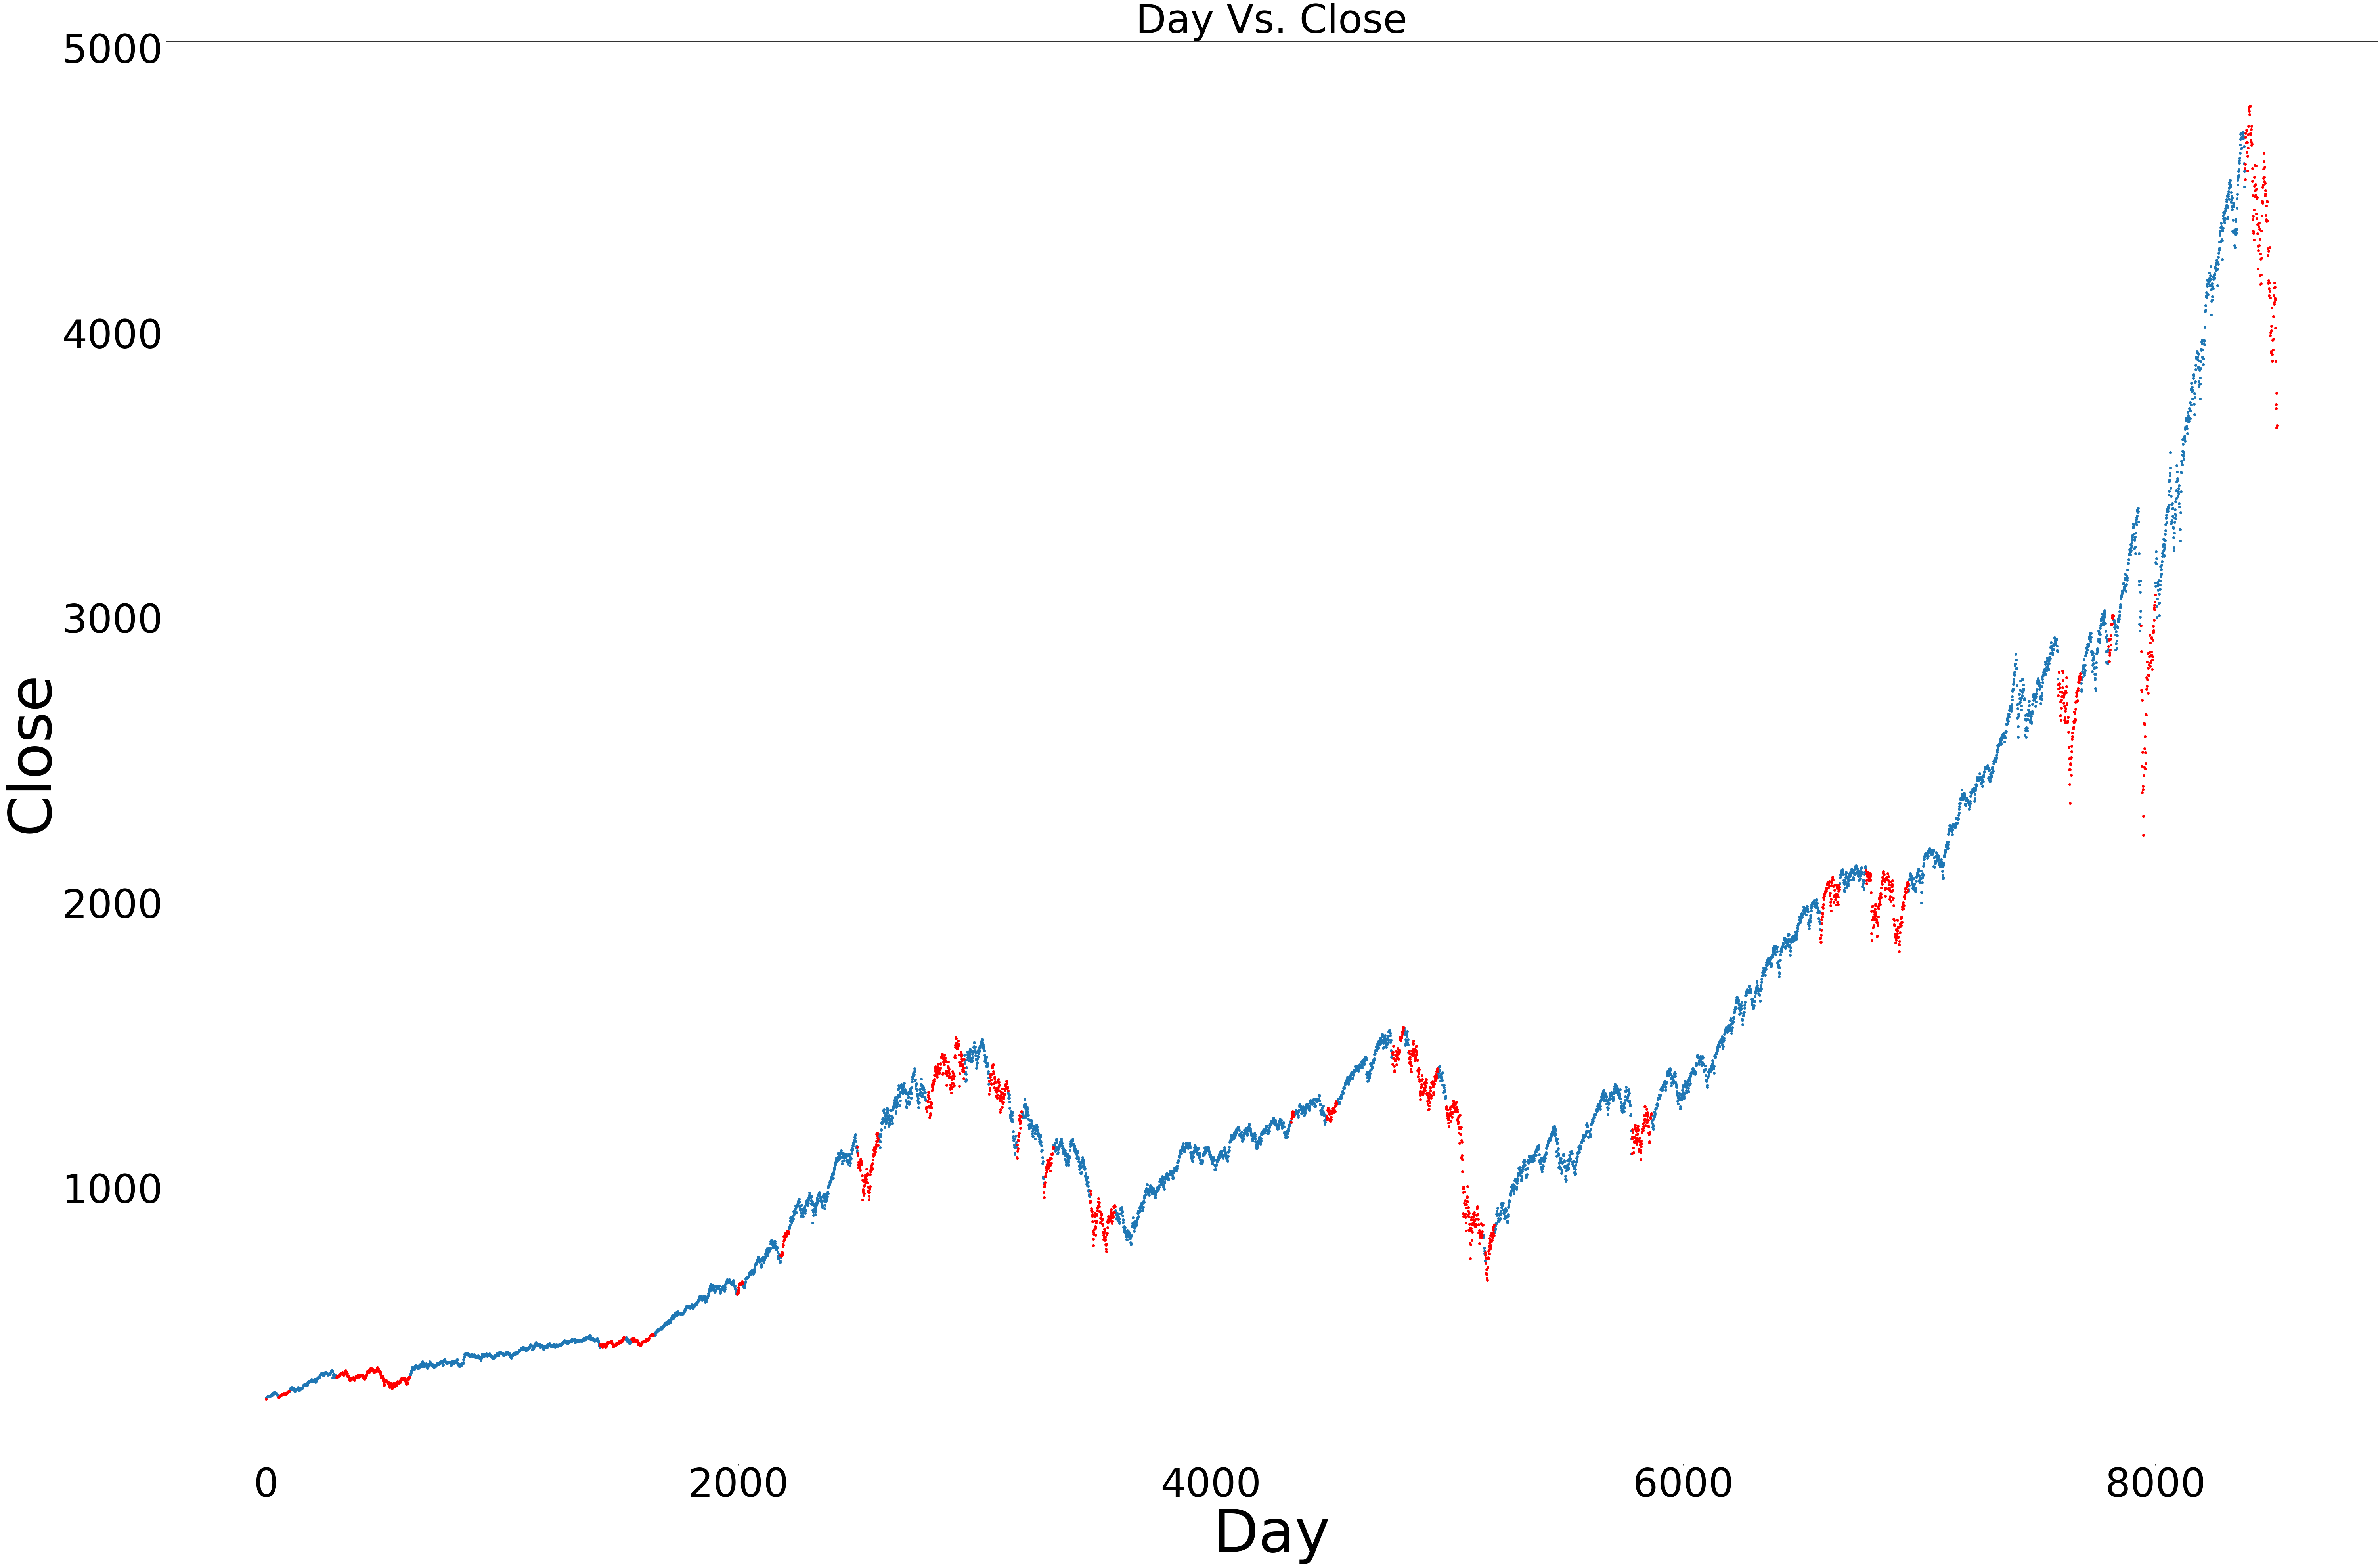

In [ ]:
plt.figure(figsize=(100,66))
plt.scatter(blue_days_np, blue_closes_np)
plt.scatter(red_days_np, red_closes_np, color='Red')
plt.xlabel('Day', fontsize=150)
plt.ylabel('Close', fontsize=150)
plt.title('Day Vs. Close', fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

blue_mean = np.mean(blue_closes_np)
blue_stddev = np.std(blue_closes_np)
blue_range = np.ptp(blue_closes_np)
blue_min = np.min(blue_closes_np)
blue_max = np.max(blue_closes_np)
blue_median = np.median(blue_closes_np)
blue_covariance = np.cov(blue_closes_np)
red_mean = np.mean(red_closes_np)
red_stddev = np.std(red_closes_np)
red_range = np.ptp(red_closes_np)
red_min = np.min(red_closes_np)
red_max = np.max(red_closes_np)
red_median = np.median(red_closes_np)
red_covariance = np.cov(red_closes_np)
print('Blue Mean: {} Red Mean: {}'.format(blue_mean, red_mean))
print('Blue Standard Deviation: {} Red Standard Deviation: {}'.format(blue_stddev, red_stddev))
print('Blue Range: {} Red Range: {}'.format(blue_range, red_range))
print('Blue Min: {} Red Min: {}'.format(blue_min, red_min))
print('Blue Max: {} Red Max: {}'.format(blue_max, red_max))
print('Blue Median: {} Red Median: {}'.format(blue_median, red_median))
print('Blue Covariance: {} Red Covariance: {}'.format(blue_covariance, red_covariance))

# Date vs Close overlaying Date x Sentiment

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text major ticklabel objects>)

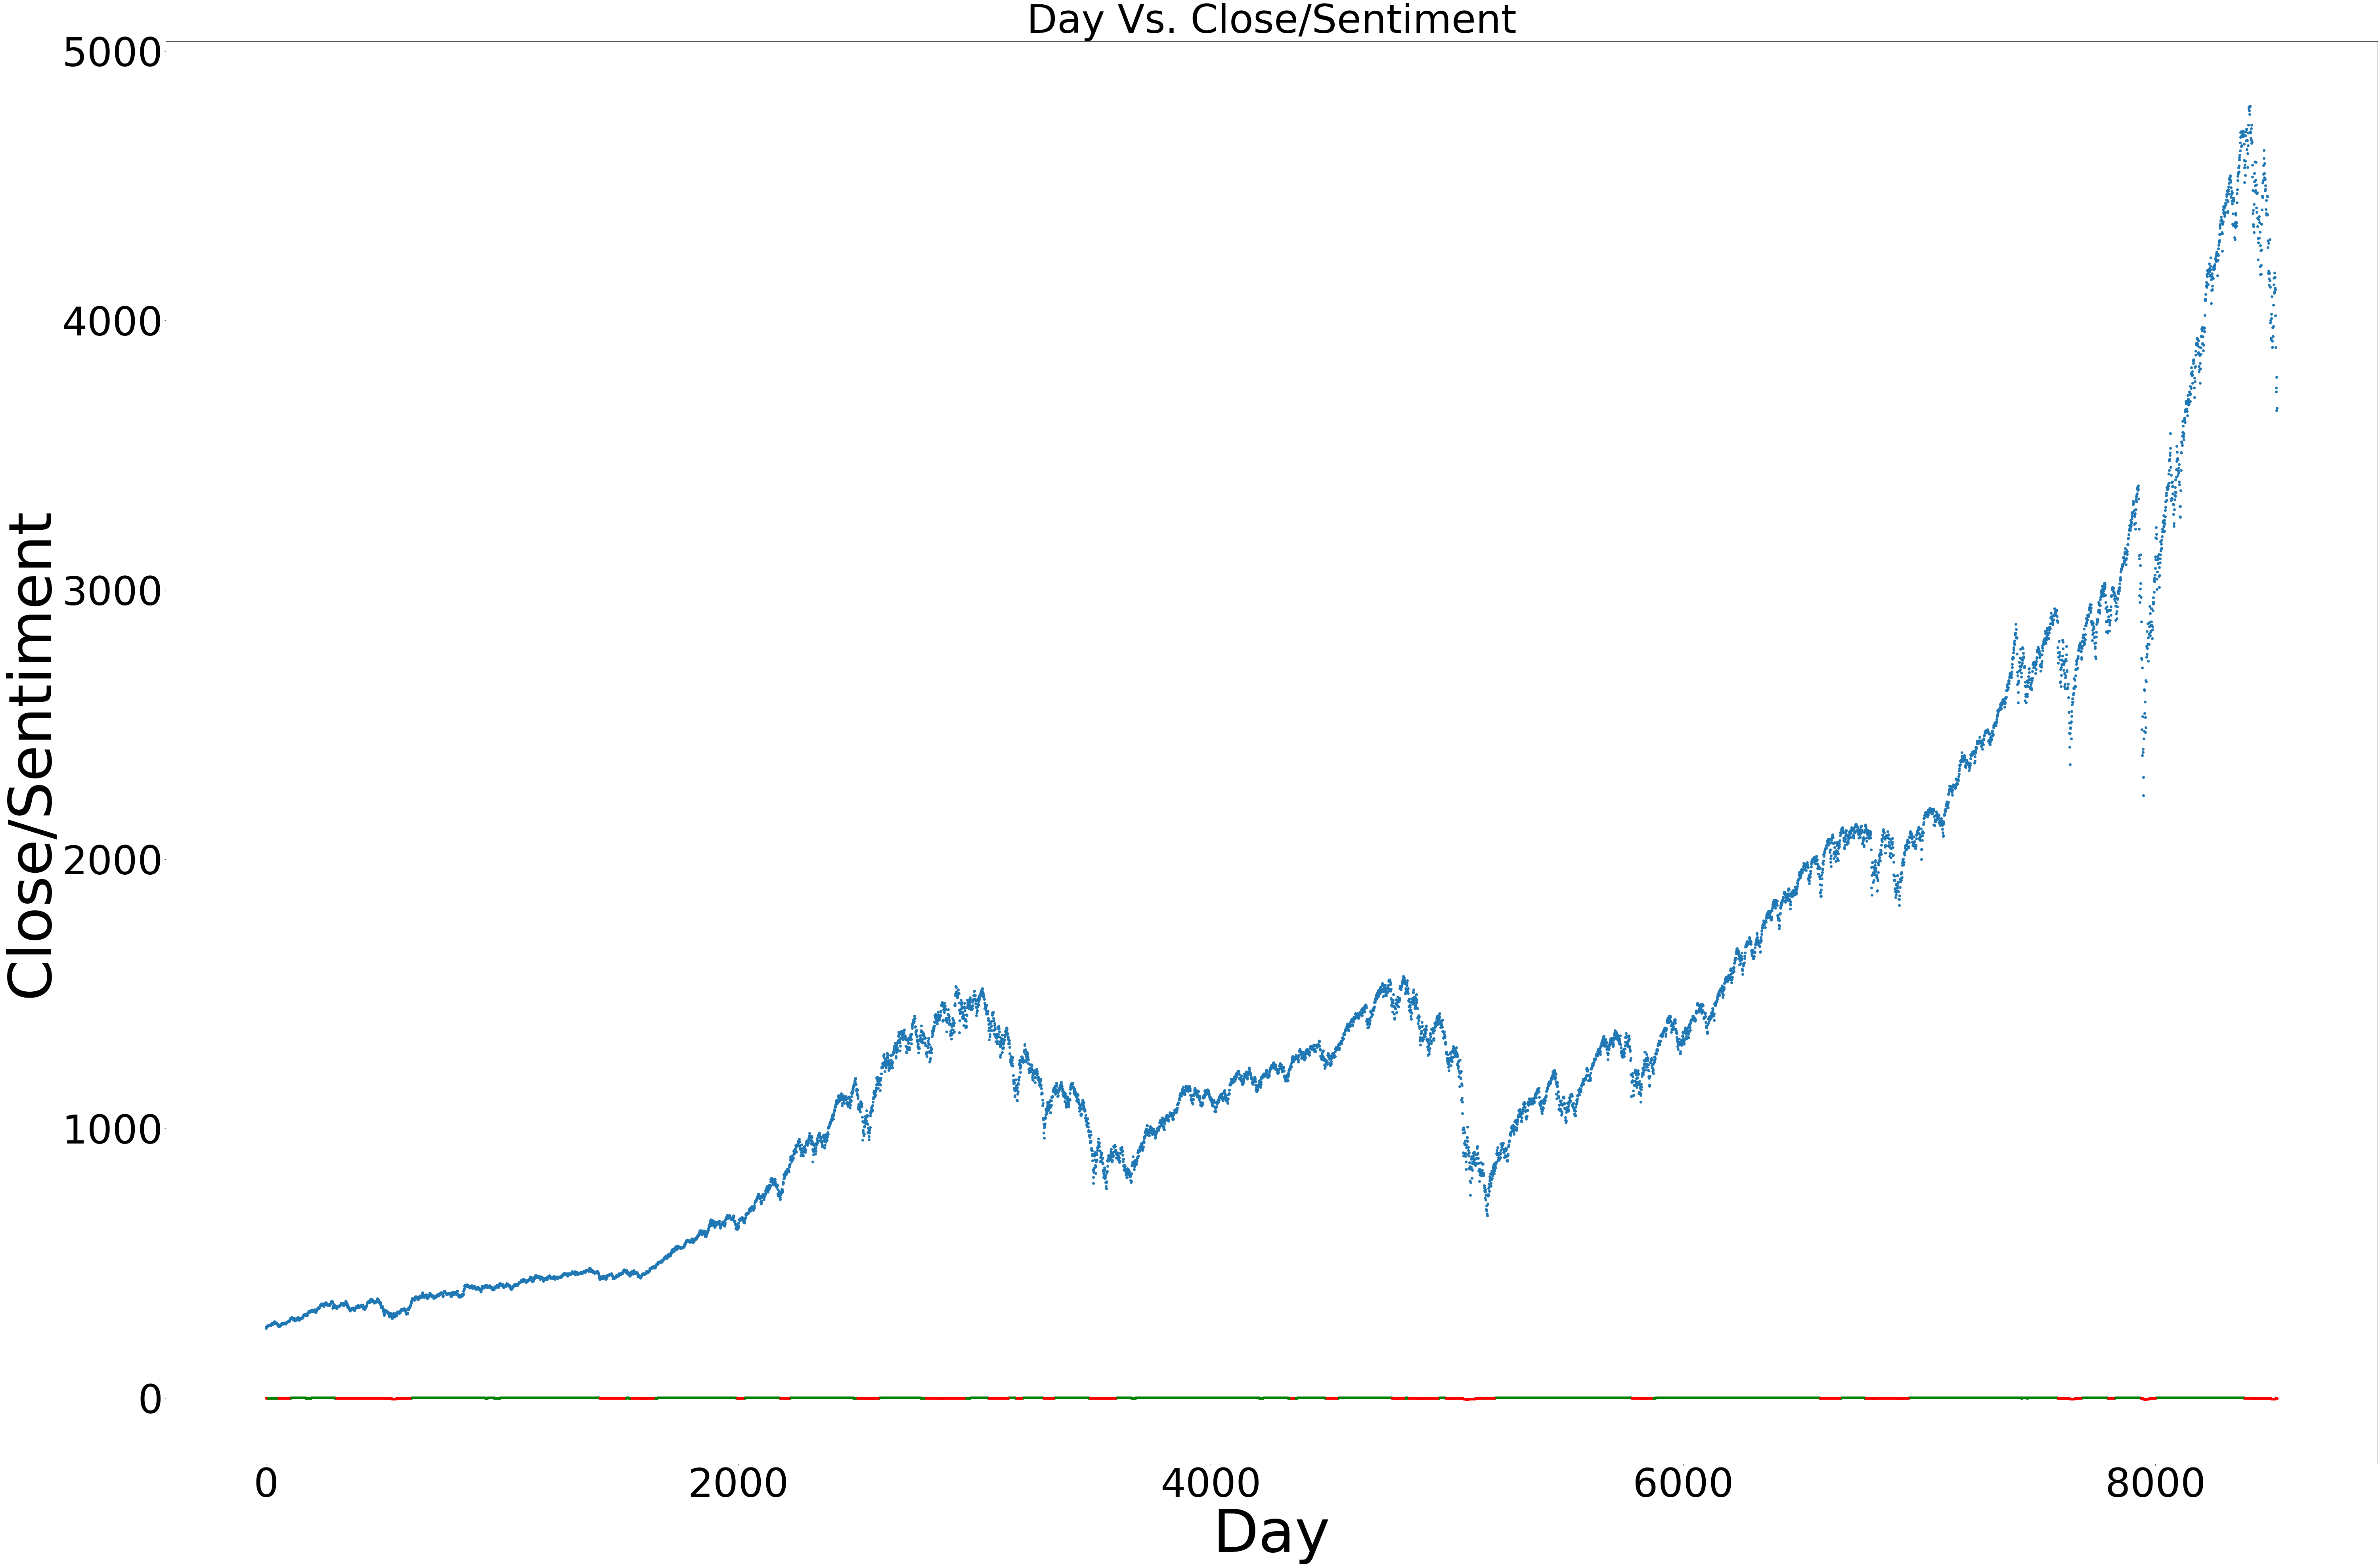

In [ ]:
plt.figure(figsize=(100,66))
plt.scatter(all_days_np, closes_len_of_sentiment)
plt.scatter(blue_days_np, green_sentiments_np, color='Green')
plt.scatter(red_days_np, red_sentiments_np, color='Red')
plt.xlabel('Day', fontsize=150)
plt.ylabel('Close/Sentiment', fontsize=150)
plt.title('Day Vs. Close/Sentiment', fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)